## Data Exploration

The program `regression.m` is based on the data `fishdata.txt`. `fishdata.txt` contains the data of fish based on its length, height, width, species and weight.
1. **Length:** Length of a fish (cm) <br>
2. **Height:** Height of a fish (cm) <br>
3. **Width:** Width of a fish (cm) <br>
4. **Species:** Species of a fish (from 1 to 6) <br>
5. **Weight:** Weight of a fish (gram) <br>

According to my program, I extract a total of 201 observations (665th-865th) from the data `fishdata.txt`,
then simulate 3 different regression models and perform residual analysis.
The regression models are based on the following dependent and independent variables:
- Dependent (Response) variable: `Weight`
- Independent (Explanatory) variables: `Length`, `Height`, `Width`, `Species`

Extract 201 observations from `fishdata.txt` and store the data into the corresponding arrays.

In [1]:
% Read txt file
fishData = readtable('fishdata.txt');

% Extract a total of 201 observations (665th-865th) from the whole data
fishData = fishData(665:865,:);

Length = table2array(fishData(:,1));
Height = table2array(fishData(:,2));
Width = table2array(fishData(:,3));
Species = table2array(fishData(:,4));
Weight = table2array(fishData(:,5));

Then, plot the matrix scatter plot to find out the relationships between dependent and independent variables. 
Since `Weight` is a dependent variable, the bottom 4 plots explain the relationship between each independent variable.

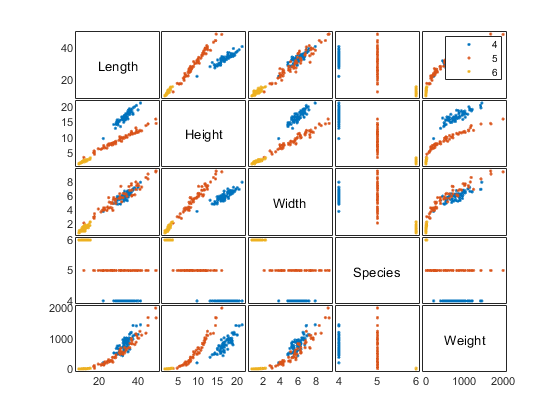

In [2]:
% Figure 1: Matrix scatter plot
X = [Length Height Width Species Weight];
xnames = {'Length','Height','Width','Species','Weight'};
color = lines(3);
gplotmatrix(X,[],Species,color,[],[],[],'variable',xnames);

## Model Setup

Based on the relationship between `Weight` and each independent variable `Length`, `Height`, `Width` and `Species`, I proposed the following 3 models.

For the **1st Model**, I try to include `Length`, `Height` and `Width` as independent variables. 
$$
  Weight_i = \alpha_0 + \alpha_1 Length_i + \alpha_2 Height_i + \alpha_3 Width_i + e_i, (i = 665,...,865)
$$

For the **2nd Model**, since I observe that the variance of `Weight` increases as the value of independent 
variables increases, I try to perform log transformation on the dependent variable `Weight`. Moreover, I try to 
include the categorical variable `Species` as a dummy variable. Because `Species` is a categorical covariate 
with three levels, it should enter the model as two indicator variables.
$$
  log(Weight)_i = \beta_0 + \beta_1 Length_i + \beta_2 Height_i + \beta_3 Width_i +
  \sum_{j=5}^6 \beta_{0j} U_j + e_i,
  (i = 665,...,865)
$$
$ U_5 = 5$ and $U_6 = 6$ are dummy varaibles representing `Species`

For the **3rd Model**, since the bottom left scatter plot suggests that the slope of `Weight` against `Length` might 
differ for each `Species`. To assess this, I try to include length-species interaction terms.
$$
  log(Weight)_i = \eta_0 + \eta_1 Length_i + \eta_2 Height_i + \eta_3 Width_i +
  \sum_{j=5}^6 (\eta_{0j} U_j + \eta_{1j} U_j Length_i) + e_i,
  (i = 665,...,865)
$$
$ U_5 = 5$ and $U_6 = 6$ are dummy varaibles representing `Species`

In [3]:
fishData.logWeight = log(Weight);        % Take log on 'Weight'
fishData.Species = categorical(Species); % Create dummy variables for 'Species'

% Model #1
fit1 = fitlm(fishData, 'Weight ~ Length + Height + Width');

% Model #2
fit2 = fitlm(fishData, 'logWeight ~ Length + Height + Width + Species');

% Model #3
fit3 = fitlm(fishData, 'logWeight ~ Length + Height + Width + Species + Length*Species');

## Residuals vs. Fitted Values

After setting up 3 different regression models, I want to find out the better model by residual analysis.
Belows are the plot of residuals vs fitted values of 3 models.

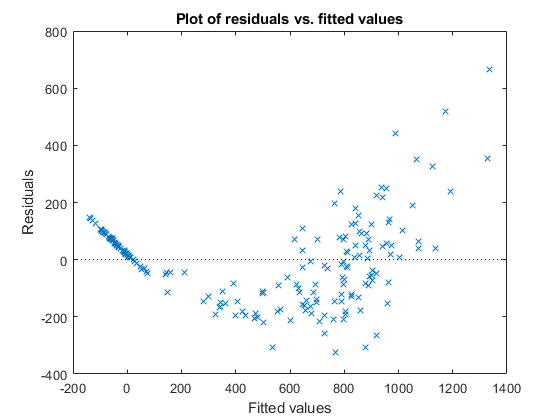

In [4]:
% Model #1
plotResiduals(fit1, 'fitted')

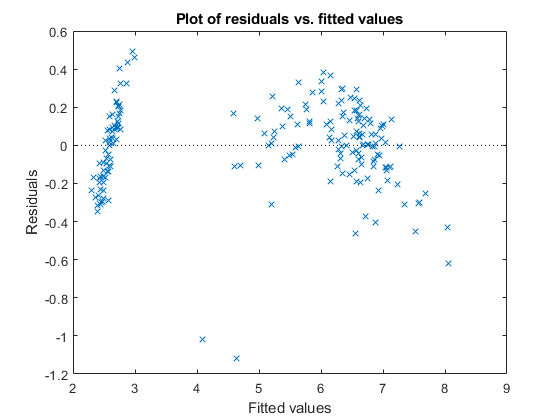

In [5]:
% Model #2
plotResiduals(fit2, 'fitted')

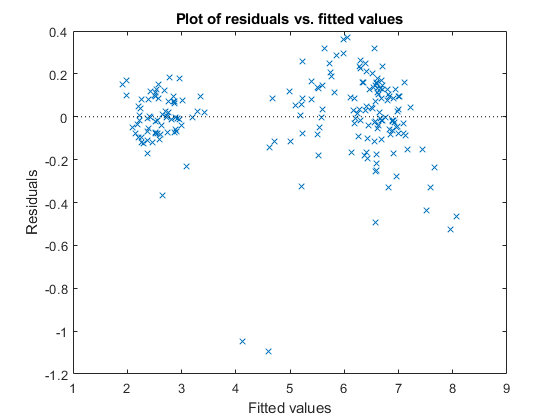

In [6]:
% Model #3
plotResiduals(fit3, 'fitted')

For the **1st Model**, we observe that the data points are not scattered randomly round the zero line. Instead, it 
seems that the data points form a convex pattern, suggesting that the mean is not zero. Also, the residual is 
greater when the fitted value increases, suggesting that the variance is not constant.

For the **2nd Model**, we observe that more data points are closer to the zero line, but there are still some 
extreme data. Also, the variance is still not constant since the data concentrated on left of the plot is denser.

For the **3rd Model**, we observe that the more data points are closer to the zero line compared with the 2nd
Model. Also, the data seems to distribute more evenly compared with the other 2 models. Although it is still 
not the best model, it is clear to observe that Model 3 is better than Model 1 and 2 based on the above 
residual plot.

## Studentized Residuals vs Fitted Values

Belows are the plot of studentized residuals vs fitted values of 3 models. It is similar to previous plots, with residual on 
the y-axis replaced by studentized residual.

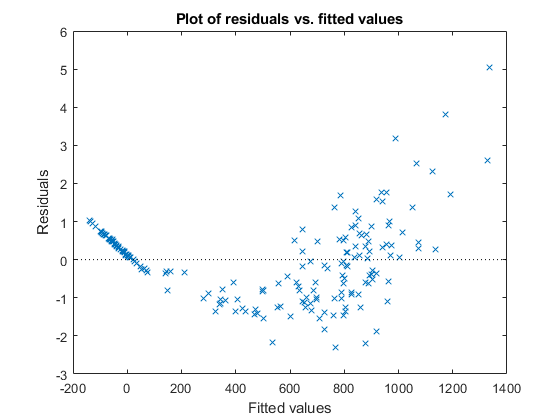

In [7]:
% Model #1
plotResiduals(fit1, 'fitted', 'ResidualType', 'studentized')

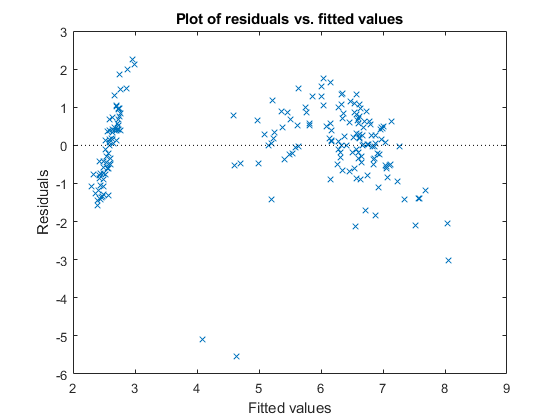

In [8]:
% Model #2
plotResiduals(fit2, 'fitted', 'ResidualType', 'studentized')

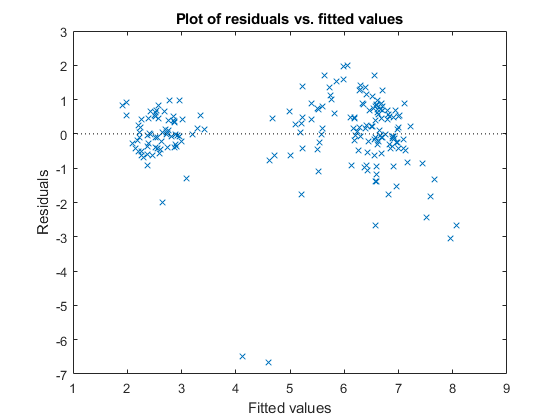

In [9]:
% Model #3
plotResiduals(fit3, 'fitted', 'ResidualType', 'studentized')

Studentized residual is a technique in the detection of outliers. An observation is said to be **an outlier** if the 
absolute value of studentized residual is **greater than 2**.

In [10]:
% Number of outliers based on studentized residuals
res = table2array(fit1.Residuals(:,3));
numOut1 = length(find(abs(res) > 2))

res = table2array(fit2.Residuals(:,3));
numOut2 = length(find(abs(res) > 2))

res = table2array(fit3.Residuals(:,3));
numOut3 = length(find(abs(res) > 2))


numOut1 =

     9


numOut2 =

     8


numOut3 =

     7




From the codes above, we obtain the following results:
|                        | Model 1 | Model 2 | Model 3 |
| ---------------------- |---------|---------|---------|
| **Number of outliers** |    9    |    8    |    7    |

## Leverage

Belows are the plot of leverage values of 3 models.
Note that data points with extreme values on the x-axis are said to have high leverage.

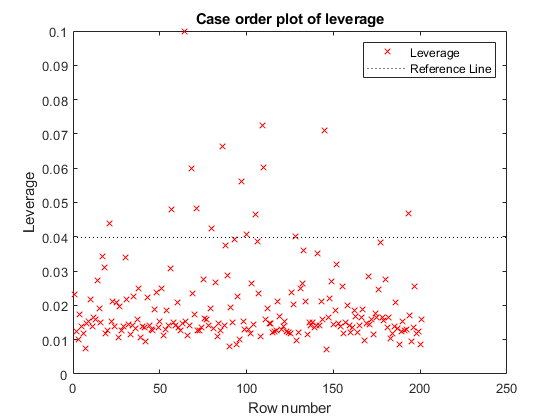

In [11]:
% Model #1
plotDiagnostics(fit1, 'leverage'); legend('show')

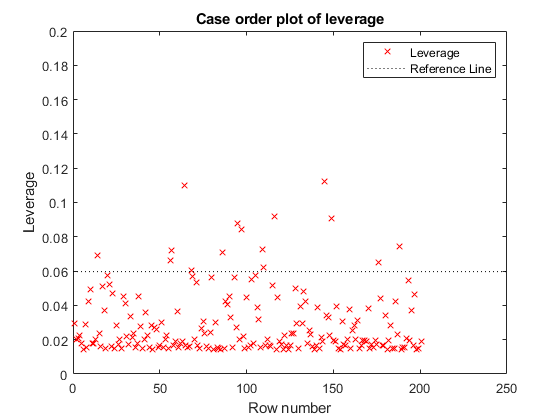

In [12]:
% Model #2
plotDiagnostics(fit2, 'leverage'); legend('show')

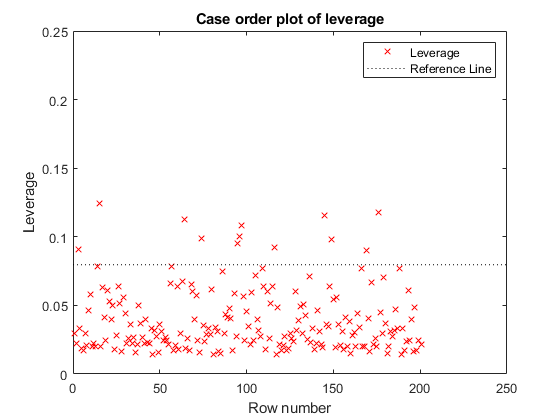

In [13]:
% Model #3
plotDiagnostics(fit3, 'leverage'); legend('show')

Leverage is a technique in the detection of leverage points. An observation is said to be **a leverage point** if the 
leverage value is greater than $2p/n$, where $p$ is the number of coefficients of the model, and $n$ is the number of observations.

For the **1st Model**, we check whether each data points have leverage value greater than $2(4) / 201 = 0.0398$. <br>
For the **2nd Model**, we check whether each data points have leverage value greater than $2(6) / 201 = 0.0597$. <br>
For the **3rd Model**, we check whether each data points have leverage value greater than $2(8) / 201 = 0.0796$. <br>
(as indicated on the dotted line of the 3 plots)

In [14]:
% Number of leverage points of the 3 regression models
t_leverage = 2*fit1.NumCoefficients/fit1.NumObservations;
numLev1 = length(find(fit1.Diagnostics.Leverage > t_leverage))

t_leverage = 2*fit2.NumCoefficients/fit2.NumObservations;
numLev2 = length(find(fit2.Diagnostics.Leverage > t_leverage))

t_leverage = 2*fit3.NumCoefficients/fit3.NumObservations;
numLev3 = length(find(fit3.Diagnostics.Leverage > t_leverage))


numLev1 =

    15


numLev2 =

    16


numLev3 =

    13




From the codes above, we obtain the following results:
|                               | Model 1 | Model 2 | Model 3 |
| ----------------------------- |---------|---------|---------|
| **Number of leverage points** |    15   |    16   |    13   |

## Cook's Distance

Belows are the plot of Cook's distance of 3 models.

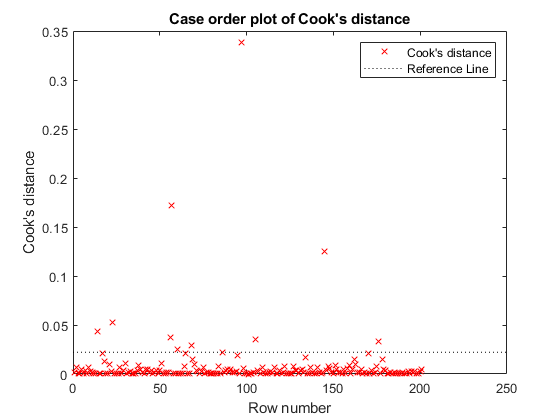

In [15]:
% Model #1
plotDiagnostics(fit1, 'cookd'); legend('show')

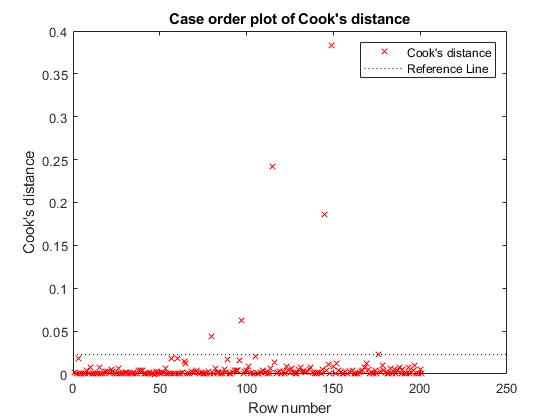

In [16]:
% Model #2
plotDiagnostics(fit2, 'cookd'); legend('show')

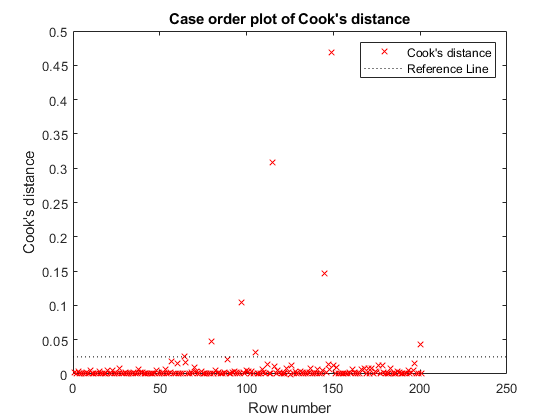

In [17]:
% Model #3
plotDiagnostics(fit3, 'cookd'); legend('show')

Cook's distance is a commonly used measure to detect the influence of data points. Note that an influential 
point is a point with large effect on the regression line. An observation is said to be **an influential point** if the 
value of Cook’s distance is greater than the threshold value (dotted line).

In [18]:
% Number of influential points based on Cook's distance
t_cookd = 3*mean(fit1.Diagnostics.CooksDistance,'omitnan');
numCD1 = length(find(fit1.Diagnostics.CooksDistance > t_cookd))

t_cookd = 3*mean(fit2.Diagnostics.CooksDistance,'omitnan');
numCD2 = length(find(fit2.Diagnostics.CooksDistance > t_cookd))

t_cookd = 3*mean(fit3.Diagnostics.CooksDistance,'omitnan');
numCD3 = length(find(fit3.Diagnostics.CooksDistance > t_cookd))


numCD1 =

    10


numCD2 =

     6


numCD3 =

     8




From the codes above, we obtain the following results:
|                                                           | Model 1 | Model 2 | Model 3 |
| --------------------------------------------------------- |---------|---------|---------|
| **Number of influential points based on Cook’s Distance** |    10   |    6    |    8    |

## Difference in Fitted Values (DFFITS)

Belows are the plot of difference in fitted values (DFFITS) of 3 models.

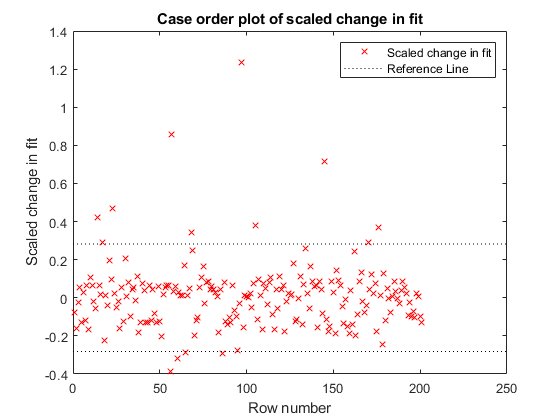

In [19]:
% Model #1
plotDiagnostics(fit1, 'dffits'); legend('show')

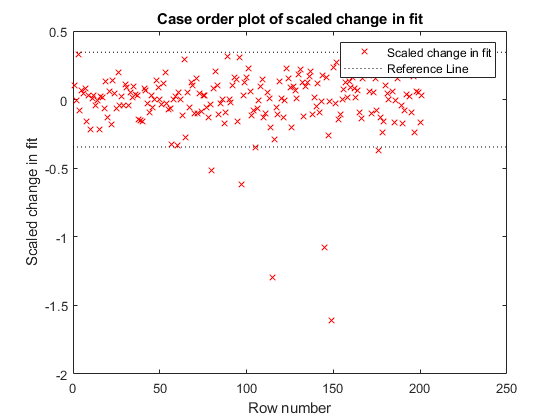

In [20]:
% Model #2
plotDiagnostics(fit2, 'dffits'); legend('show')

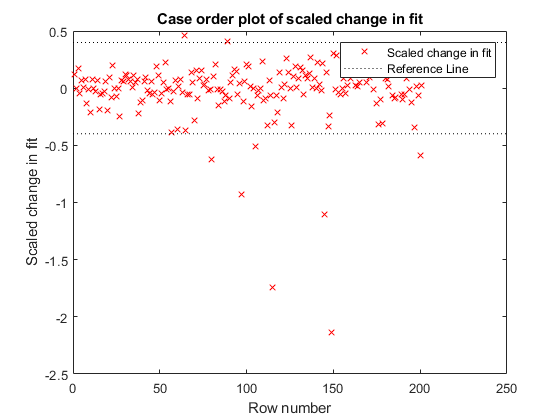

In [21]:
% Model #3
plotDiagnostics(fit3, 'dffits'); legend('show')

DFFITS is a diagnostic to show how influential a data point is in a regression model. An observation is said to 
be **an influential point** if
$$
  |DFFITS_i| \left\{
  \begin{array}{ll}
        > 1 & n \leq 50 \\
        > 2 \sqrt{p/n} & n > 50
  \end{array} 
  \right.
$$
where $p$ is the number of coefficients of the model, and $n$ is the number of observations.

For the **1st Model**, we check whether each data points have $|DFFITS_i| > 2\sqrt{4/201} = 0.282$. <br>
For the **2nd Model**, we check whether each data points have $|DFFITS_i| > 2\sqrt{6/201} = 0.346$. <br>
For the **3rd Model**, we check whether each data points have $|DFFITS_i| > 2\sqrt{8/201} = 0.399$. <br>
(as indicated on the dotted line of the 3 plots)

In [22]:
% Number of influential points based on DFFITS
t_dffits = 2*sqrt(fit1.NumCoefficients/fit1.NumObservations);
numDF1 = length(find(abs(fit1.Diagnostics.dffits) > t_dffits))

t_dffits = 2*sqrt(fit2.NumCoefficients/fit2.NumObservations);
numDF2 = length(find(abs(fit2.Diagnostics.dffits) > t_dffits))

t_dffits = 2*sqrt(fit3.NumCoefficients/fit3.NumObservations);
numDF3 = length(find(abs(fit3.Diagnostics.dffits) > t_dffits))


numDF1 =

    14


numDF2 =

     7


numDF3 =

     9




From the codes above, we obtain the following results:
|                                                                                | Model 1 | Model 2 | Model 3 |
| ------------------------------------------------------------------------------ |---------|---------|---------|
| **Number of influential points based on Difference in Fitted Values (DFFITS)** |    14   |    7    |    9    |

## Residuals Sum of Squares (RSS)

Finally, we obtain the residual sum of squares (RSS) of 3 models.

RSS is a statistical technique used in regression analysis to determine the dispersion of data points. 
It measures the amount of error between regression model and true model, 
which determines how well the data can fit to a regression model. 
If RSS is smaller (closer to zero), the regression model is said to have less dispersion, hence closer to the true model.

In [23]:
% Obtain Residuals Sum of Squares (RSS)
res = table2array(fit1.Residuals(:,1));
RSS1 = sum(res.^2)

res = table2array(fit2.Residuals(:,1));
RSS2 = sum(res.^2)

res = table2array(fit3.Residuals(:,1));
RSS3 = sum(res.^2)


RSS1 =

   4.0732e+06


RSS2 =

    9.6335


RSS3 =

    6.8091




From the codes above, we obtain the following results:
|                                    | Model 1                | Model 2 | Model 3 |
| ---------------------------------- |------------------------|---------|---------|
| **Residuals Sum of Squares (RSS)** | 4.0732\*10<sup>6</sup> | 9.6335  | 6.8091  |

## Conclusion

To summarize, we obtain the following the results:
|                                                                                | Model 1                | Model 2 | Model 3 |
| -------------------------------------------------------------------------------|------------------------|---------|---------|
| **Number of outliers**                                                         |    9                   |    8    |    7    |
| **Number of leverage points**                                                  |    15                  |    16   |    13   |
| **Number of influential points based on Cook’s Distance**                      |    10                  |    6    |    8    |
| **Number of influential points based on Difference in Fitted Values (DFFITS)** |    14                  |    7    |    9    |
| **Residuals Sum of Squares (RSS)**                                             | 4.0732\*10<sup>6</sup> | 9.6335  | 6.8091  |

It is obvious to conclude that Model 2 and 3 is better than Model 1.

For Model 2, although it has 1 more leverage point than Model 1, by comparing with other diagnostics, the
number of influential points and outliers are lesser. More importantly, RSS of Model 2 is decreased 
significantly, suggesting that there is less dispersion of data points than Model 1.

For Model 3, it is better than Model 1 by similar argument above. However, to compare with model 2, there is 
no conclusive evidence that either of them is better. Although RSS of Model 3 is smaller, the number of 
influential points is slightly greater than that of Model 2.

Based on the number of outliers and leverage points of Model 3, we might still draw a conclusion that Model 3
is slightly better than Model 2. However, there are still other possible models which are better than Model 3 
since there are still rooms for improvement on Model 3.